## DATA VISUALISATION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [3]:
file1=pd.read_csv('IEEE dataset/ORIGINAL DATA/corona_tweets_01.csv',header=None)
file2=pd.read_csv('IEEE dataset/ORIGINAL DATA/corona_tweets_02.csv',header=None)

In [4]:
file1.head(n=10)

,0,1
0,1240727808080412673,0.357143
1,1240727808005079041,0.116071
2,1240727808340414464,-0.050000
3,1240727808629813248,-0.714286
4,1240727808617230336,0.700000
5,1240727808726482944,0.000000
6,1240727808705466370,0.000000
7,1240727808495812608,0.216667
8,1240727808869097472,-0.200000
9,1240727809225441280,0.000000


In [5]:
file1.shape

(831327, 2)

In [6]:
sent_score1=file1.values[:,1]                 #sentiment score
sent_score2=file2.values[:,1]
sent_=np.concatenate((sent_score1,sent_score2))

In [7]:
sent_

array([ 0.35714286,  0.11607143, -0.05      , ...,  0.        ,
       -0.15      ,  0.0037037 ])

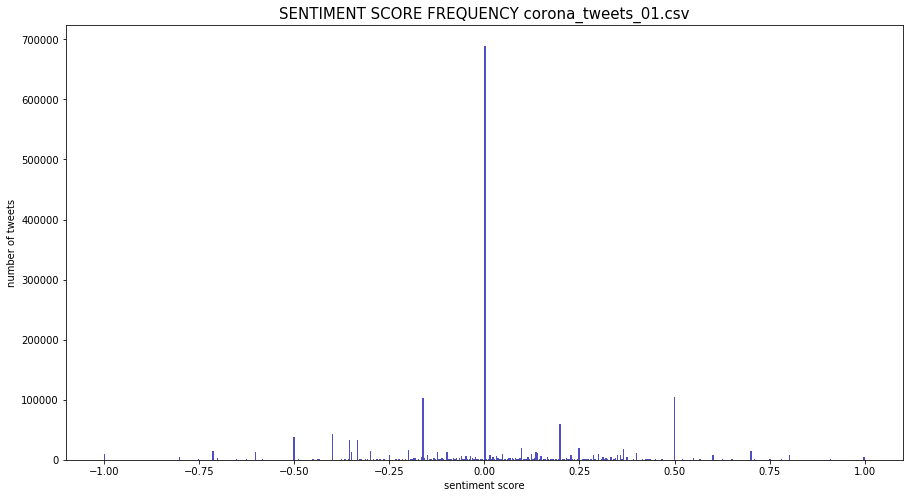

In [8]:
plt.figure(figsize=(15,8))
n, bins, patches = plt.hist(x=sent_, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('sentiment score')
plt.ylabel('number of tweets')
plt.title('SENTIMENT SCORE FREQUENCY corona_tweets_01.csv',fontsize=15)
plt.show()


### * *the dataset is imbalanced i.e., majority of the tweets are NEUTRAL(represented by sentiment score 0)*
### *  *Less number of tweets have positive or negative sentiment*

In [9]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)),['tweet_id','sentiment'], rotation=90)
    plt.yticks(range(len(corr.columns)),['tweet_id','sentiment'])
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix corona_tweets_01.csv', fontsize=15)
    plt.show()

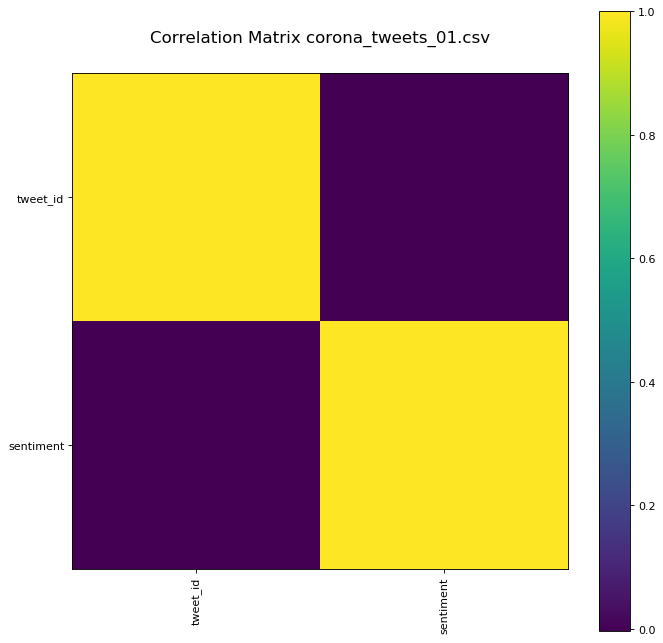

In [10]:
plotCorrelationMatrix(file1, 10)

In [11]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot for file april28-may29.csv',fontsize=textSize)
    plt.show()

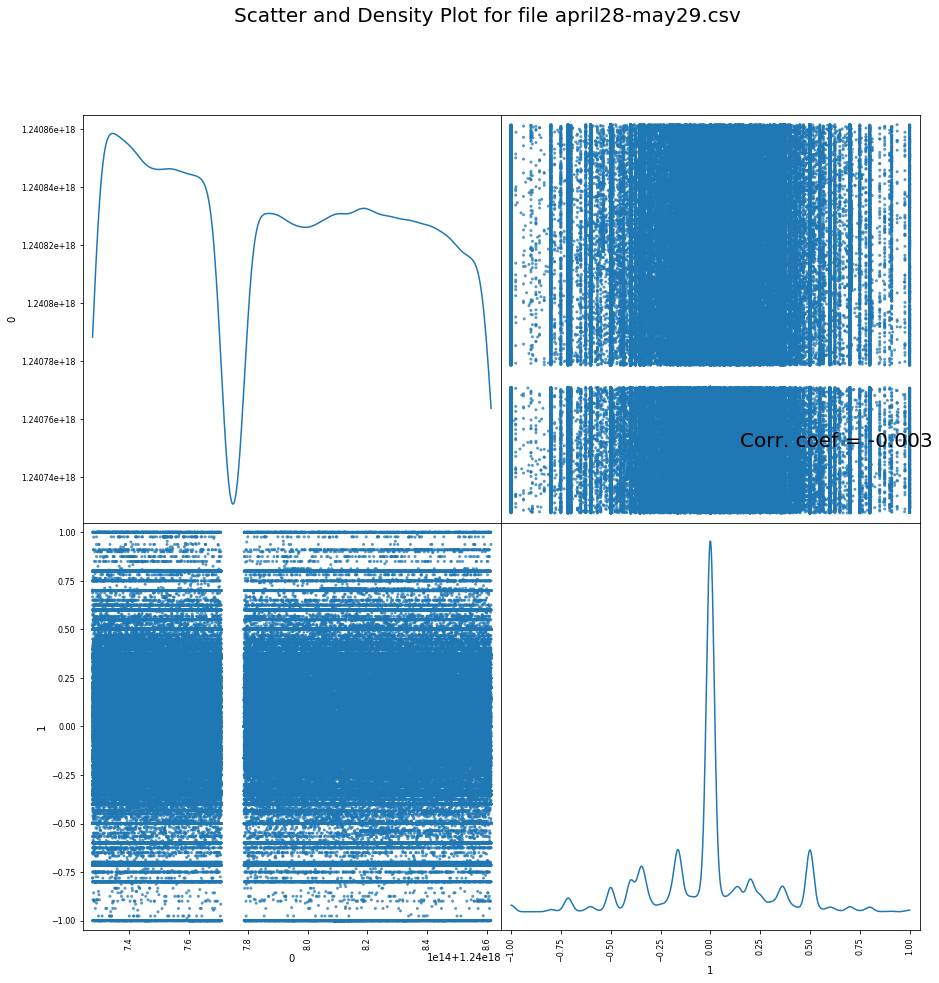

In [13]:
plotScatterMatrix(file1, 15,20)

## PREPROCESSING AND HYDRATING TWEETS

* An additional helper jupyter notebook has been made for hydrating and preprocessing the tweets
* Check the ipynb notebook named as "HYDRATING TWEET IDS AND PREPROCESSING THEM.ipynb"
* The clean_tweets and their sentiments were stored in .txt format in the directory IEEE dataset/PROCESSED DATA

##### STEPS USED IN CLEANING TWEETS
* LowerCasing- The tweet is first converted into lower case
* Removal of Retweet|RT|via
* Removal of mentions(like @xyz)
* Removal of links in the tweet
* Negation handling
* Tokenisation to get standard english words only
* Stop word removal - the stopwords were modified
* Lemmatization using WordNetLemmatizer

In [12]:
# checking the first 10 clean tweets and their sentiment
file=open('IEEE dataset/PROCESSED DATA/corona_tweets_01.txt','r')
line=file.readlines()
i=0
for l in line:
    print(l)
    i+=1
    if(i==10):
        break

file.close()

file_=open('IEEE dataset/PROCESSED DATA/corona_tweets_02.txt','r')
line_=file_.readlines()

0.35714285714285715 kalau terpaksa keluar rumah pakai untuk memastikan orang jaga social distancing dengan anda

-0.05 longer defend make excuse reasoning want intentional racist

0.21666666666666667 pretty much corona virus germ want entered body passed hour bodied shot henny

0.7 good came china

-0.7142857142857143 everyone look sick

0.0 corona day feel like sunday

-0.2 china irresponsible criminal behavior wake covid leave weakest global position mem

-0.6499999999999999 ram also releasing veteran clay matthew per

0.0 pls dear news amp press conference around country corona virus emergency sign langua

-0.3528571428571429 nasty flu went round december early jan telling corona bare ppl sick includ



In [13]:
total_lines=len(line)+len(line_)
print(total_lines)

672767


## DATASET PREPARATION

In [14]:
import os

In [15]:
data=[]

In [16]:
for fx in os.listdir('IEEE dataset/PROCESSED DATA/'):
    print(fx)
    file=open('IEEE dataset/PROCESSED DATA/'+fx,'r')
    data_=file.read()
    lines=data_.split('\n')
    for l in lines:
        df=l.split(' ')
        sent=df[0]
        tweet=' '.join(df[1:])
        if sent!='' and tweet!='':
            a=[]
            a.append(tweet)
            a.append(sent)
        data.append(a)

corona_tweets_01.txt
corona_tweets_02.txt


In [17]:
file.close()

In [18]:
data[1:10]

[['longer defend make excuse reasoning want intentional racist', '-0.05'],
 ['pretty much corona virus germ want entered body passed hour bodied shot henny',
  '0.21666666666666667'],
 ['good came china', '0.7'],
 ['everyone look sick', '-0.7142857142857143'],
 ['corona day feel like sunday', '0.0'],
 ['china irresponsible criminal behavior wake covid leave weakest global position mem',
  '-0.2'],
 ['ram also releasing veteran clay matthew per', '-0.6499999999999999'],
 ['pls dear news amp press conference around country corona virus emergency sign langua',
  '0.0'],
 ['nasty flu went round december early jan telling corona bare ppl sick includ',
  '-0.3528571428571429']]

In [19]:
print(len(data))

672769


In [23]:
np.random.shuffle(data)

In [24]:
data[0:10]

array([['corona thing weekend boring without soccer', '-1.0'],
       ['corona day feel like sunday', '0.0'],
       ['experience recovered patient corona virus let strong conquer',
        '0.5416666666666666'],
       ['thing could save evilness trump enablers stupidity honour among thief',
        '-0.3'],
       ['muted every version corona covid whatever see time line except spelling basically meant lol',
        '0.8'],
       ['daniel pared vou virar uma quina guerra pra votar neste mongol ide',
        '0.0'],
       ['terrible daughter older explain corona virus pandemic staed people eating bat',
        '-0.4166666666666667'],
       ['day rediscovered farming', '0.0'],
       ['everyone look sick', '-0.7142857142857143'],
       ['medical testimony wodarg corona panic', '0.0']], dtype='<U280')

In [25]:
data=np.asarray(data)
X=data[:,0]
Y_=data[:,1]

In [26]:
Y=[]
for e in Y_:
    float_e=float(e)
    Y.append(float_e)

In [27]:
print(len(X),len(Y))

672769 672769


## GENERATING WORDCLOUD

In [98]:
WordCloud?

In [30]:
wc=' '.join(X)

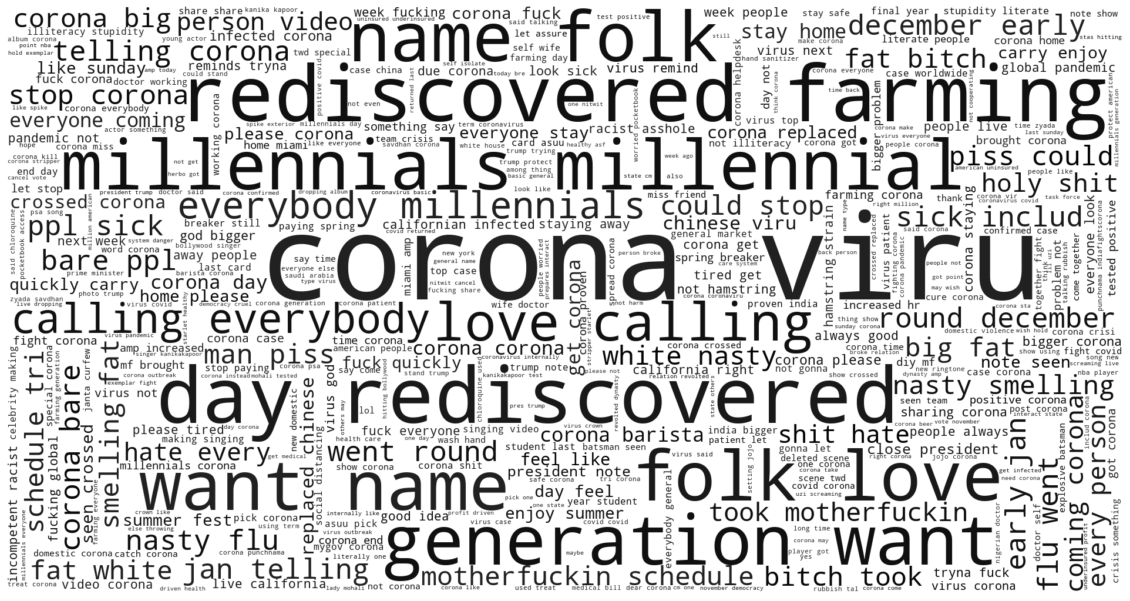

In [99]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud = WordCloud(min_font_size=10,width=1900,height=1000, max_words=800, background_color="white",colormap=cmap).generate(wc)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [100]:
wordcloud.to_file("word_cloud.png")

##  WORD EMBEDDINGS USING GLOVE

In [120]:
#using glove embedding

In [121]:
glove_file=open('glove.6B.50d.txt',encoding='utf8')

In [122]:
word_vec_dict={}
for l in glove_file:
    lis=l.split(' ')
    word=lis[0]
    coef=np.asarray(lis[1:],dtype=float)
    word_vec_dict[word]=coef

In [123]:
word_vec_dict['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [124]:
word_vec_dict['lockdown']

array([-0.47487 , -0.81948 , -0.18139 ,  0.057474, -0.75038 , -1.1057  ,
        1.1509  ,  0.19458 ,  0.5769  , -0.043834,  0.01082 , -0.95895 ,
       -0.32281 ,  0.27198 ,  0.46615 ,  0.76463 , -0.27439 , -0.17523 ,
       -0.30079 ,  0.76395 ,  0.043029,  0.36852 , -0.81589 , -0.30727 ,
       -0.61097 ,  0.21033 ,  0.64635 ,  0.28157 ,  0.45558 ,  0.1261  ,
        0.61943 , -0.13525 , -0.42841 , -0.12151 , -0.42193 ,  1.2432  ,
        1.6955  , -1.1186  , -0.42648 , -0.19214 , -0.67354 , -0.47223 ,
       -0.26242 ,  0.76397 ,  0.075944, -0.63414 ,  0.97899 , -0.08325 ,
       -0.32151 , -0.062519])

In [125]:
glove_file.close()

In [27]:
#using word2vec

In [28]:
import gensim
from gensim.models import KeyedVectors

In [31]:
kv=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [32]:
kv["lockdown"]

array([-2.08007812e-01, -1.25976562e-01,  2.75390625e-01,  9.37500000e-02,
        2.80761719e-02, -1.68945312e-01, -2.03125000e-01, -1.07910156e-01,
        1.21582031e-01,  8.25195312e-02,  2.08740234e-02, -4.33593750e-01,
        3.14453125e-01, -3.61328125e-02,  8.30078125e-02,  1.51367188e-01,
        1.91406250e-01,  2.28271484e-02,  5.15136719e-02, -1.58203125e-01,
        1.65039062e-01,  1.65039062e-01,  6.44531250e-02,  1.87500000e-01,
       -3.94531250e-01,  1.25000000e-01,  3.94531250e-01, -4.25781250e-01,
        3.75000000e-01, -1.12792969e-01, -9.76562500e-02, -3.69140625e-01,
        1.16210938e-01, -2.92968750e-01,  4.00390625e-02, -3.02734375e-01,
       -1.37695312e-01, -4.66308594e-02, -2.25585938e-01,  1.90429688e-01,
        7.51953125e-02,  1.44531250e-01, -9.17968750e-02, -1.45507812e-01,
        2.92968750e-01, -6.71386719e-03,  1.24023438e-01,  6.98242188e-02,
       -3.24218750e-01,  2.28515625e-01, -1.95312500e-02,  5.88989258e-03,
       -6.64062500e-02,  

## EMBEDDING LAYER OUTPUT

In [126]:
#finding max_word_length for the embedding matrix
word_lens=[]
for sent in X:
    words=sent.split(' ')
    word_len=len(words)
    word_lens.append(word_len)

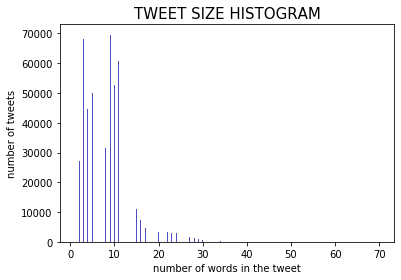

In [127]:
n, bins, patches = plt.hist(x=word_lens, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('number of words in the tweet')
plt.ylabel('number of tweets')
plt.title('TWEET SIZE HISTOGRAM',fontsize=15)
plt.show()

In [128]:
# from above data majority tweets have 30 as average word length
max_words=35

In [129]:
len_X=len(X)

In [130]:
def emb_out(X,max_words):
    out=np.zeros((len_X,max_words,50),dtype='float32')
    for i,s in enumerate(X):
        words_=s.split(' ')
        words_=words_[:max_words]
        for j,w in enumerate(words_):
            try:
                out[i][j]=word_vec_dict[w]
            except:
                out[i][j]=np.zeros((50,))
            
    return out

In [131]:
X_emb=emb_out(X,35)

In [132]:
X_emb.shape

(672769, 35, 50)

In [133]:
split=int(0.8*X_emb.shape[0])
X_train=X_emb[:split,:,:]
X_test=X_emb[split:,:,:]
Y_train=Y_[:split]
Y_test=Y_[split:]

In [134]:
print(X_train.shape,len(Y_train))
print(X_test.shape,len(Y_test))

(538215, 35, 50) 538215
(134554, 35, 50) 134554


## MODEL ARCHITECTURE 

In [135]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [39]:
model=Sequential()
model.add(LSTM(32,input_shape=(35,50),return_sequences=True))
model.add(Dropout(0.5))      #dropout to avoid overfitting
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1,activation='tanh'))

W0728 23:52:38.573603  5396 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 23:52:38.611819  5396 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 23:52:38.626059  5396 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 23:52:38.900945  5396 deprecation_wrapper.py:119] From c:\users\kritika\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_defa

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 35, 32)            10624     
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 18,977
Trainable params: 18,977
Non-trainable params: 0
_________________________________________________________________


## COMPILING AND TRAINING THE MODEL

In [151]:
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [152]:
model=Sequential()
model.add(LSTM(32,input_shape=(35,50),return_sequences=True))
model.add(Dropout(0.5))      #dropout to avoid overfitting
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(1,activation='tanh'))

In [153]:
model.compile(loss='mae',optimizer='adam',metrics=[r2_score,rmse,'mse','msle'])

In [154]:
check_point1=ModelCheckpoint('model_weights/best_model_ADAM2.h5',
    monitor='val_r2_score',
    verbose=True,
    save_best_only=True,
    mode='max',
    period=1,
)

### FOR FIRST 200 EPOCHS

In [155]:
hist1=model.fit(X_train,Y_train,epochs=200,batch_size=512,shuffle=True,validation_split=0.3,callbacks=[check_point1])

Train on 376750 samples, validate on 161465 samples
Epoch 1/200
376750/376750 [==============================] - 158s 419us/step - loss: 0.1340 - r2_score: 0.4083 - rmse: 0.1340 - mean_squared_error: 0.0526 - mean_squared_logarithmic_error: 0.0171 - val_loss: 0.1067 - val_r2_score: 0.5499 - val_rmse: 0.1067 - val_mean_squared_error: 0.0395 - val_mean_squared_logarithmic_error: 0.01350.1373 - r2_score: 0.3866 - rmse: 0.1373 - mean_squared_error: 0.0546 - 

Epoch 00001: val_r2_score improved from -inf to 0.54986, saving model to model_weights/best_model_ADAM2.h5
Epoch 2/200
376750/376750 [==============================] - 137s 364us/step - loss: 0.1091 - r2_score: 0.5664 - rmse: 0.1091 - mean_squared_error: 0.0386 - mean_squared_logarithmic_error: 0.0129 - val_loss: 0.0976 - val_r2_score: 0.6008 - val_rmse: 0.0976 - val_mean_squared_error: 0.0350 - val_mean_squared_logarithmic_error: 0.0116

Epoch 00002: val_r2_score improved from 0.54986 to 0.60077, saving model to model_weights/best_mo


Epoch 00036: val_r2_score improved from 0.71839 to 0.71953, saving model to model_weights/best_model_ADAM2.h5
Epoch 37/200
376750/376750 [==============================] - 135s 359us/step - loss: 0.0748 - r2_score: 0.7227 - rmse: 0.0748 - mean_squared_error: 0.0246 - mean_squared_logarithmic_error: 0.0083 - val_loss: 0.0695 - val_r2_score: 0.7189 - val_rmse: 0.0695 - val_mean_squared_error: 0.0246 - val_mean_squared_logarithmic_error: 0.0084

Epoch 00037: val_r2_score did not improve from 0.71953
Epoch 38/200
376750/376750 [==============================] - 111s 296us/step - loss: 0.0747 - r2_score: 0.7231 - rmse: 0.0747 - mean_squared_error: 0.0246 - mean_squared_logarithmic_error: 0.0083 - val_loss: 0.0670 - val_r2_score: 0.7198 - val_rmse: 0.0670 - val_mean_squared_error: 0.0246 - val_mean_squared_logarithmic_error: 0.0085

Epoch 00038: val_r2_score improved from 0.71953 to 0.71983, saving model to model_weights/best_model_ADAM2.h5
Epoch 39/200
376750/376750 [======================


Epoch 00075: val_r2_score did not improve from 0.73100
Epoch 76/200
376750/376750 [==============================] - 80s 212us/step - loss: 0.0708 - r2_score: 0.7404 - rmse: 0.0708 - mean_squared_error: 0.0231 - mean_squared_logarithmic_error: 0.0078 - val_loss: 0.0659 - val_r2_score: 0.7273 - val_rmse: 0.0659 - val_mean_squared_error: 0.0239 - val_mean_squared_logarithmic_error: 0.0082

Epoch 00076: val_r2_score did not improve from 0.73100
Epoch 77/200
376750/376750 [==============================] - 87s 230us/step - loss: 0.0706 - r2_score: 0.7415 - rmse: 0.0706 - mean_squared_error: 0.0230 - mean_squared_logarithmic_error: 0.0077 - val_loss: 0.0647 - val_r2_score: 0.7305 - val_rmse: 0.0647 - val_mean_squared_error: 0.0236 - val_mean_squared_logarithmic_error: 0.0081

Epoch 00077: val_r2_score did not improve from 0.73100
Epoch 78/200
376750/376750 [==============================] - 86s 228us/step - loss: 0.0705 - r2_score: 0.7413 - rmse: 0.0705 - mean_squared_error: 0.0230 - mean_

376750/376750 [==============================] - 109s 289us/step - loss: 0.0688 - r2_score: 0.7494 - rmse: 0.0688 - mean_squared_error: 0.0223 - mean_squared_logarithmic_error: 0.0075 - val_loss: 0.0648 - val_r2_score: 0.7345 - val_rmse: 0.0648 - val_mean_squared_error: 0.0233 - val_mean_squared_logarithmic_error: 0.0080

Epoch 00116: val_r2_score did not improve from 0.73502
Epoch 117/200
376750/376750 [==============================] - 120s 318us/step - loss: 0.0686 - r2_score: 0.7502 - rmse: 0.0686 - mean_squared_error: 0.0222 - mean_squared_logarithmic_error: 0.0075 - val_loss: 0.0642 - val_r2_score: 0.7340 - val_rmse: 0.0642 - val_mean_squared_error: 0.0233 - val_mean_squared_logarithmic_error: 0.0080.0686 - r2_score: 0.7503 - rmse: 0.0686 - mean_squared_error

Epoch 00117: val_r2_score did not improve from 0.73502
Epoch 118/200
376750/376750 [==============================] - 204s 542us/step - loss: 0.0688 - r2_score: 0.7494 - rmse: 0.0688 - mean_squared_error: 0.0223 - mean_squa


Epoch 00136: val_r2_score did not improve from 0.73528
Epoch 137/200
376750/376750 [==============================] - 139s 370us/step - loss: 0.0681 - r2_score: 0.7529 - rmse: 0.0681 - mean_squared_error: 0.0220 - mean_squared_logarithmic_error: 0.0074 - val_loss: 0.0635 - val_r2_score: 0.7353 - val_rmse: 0.0635 - val_mean_squared_error: 0.0232 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00137: val_r2_score improved from 0.73528 to 0.73534, saving model to model_weights/best_model_ADAM2.h5
Epoch 138/200
376750/376750 [==============================] - 139s 369us/step - loss: 0.0680 - r2_score: 0.7531 - rmse: 0.0680 - mean_squared_error: 0.0219 - mean_squared_logarithmic_error: 0.0073 - val_loss: 0.0637 - val_r2_score: 0.7360 - val_rmse: 0.0637 - val_mean_squared_error: 0.0231 - val_mean_squared_logarithmic_error: 0.0080

Epoch 00138: val_r2_score improved from 0.73534 to 0.73604, saving model to model_weights/best_model_ADAM2.h5
Epoch 139/200
376750/376750 [===================

376750/376750 [==============================] - 202s 537us/step - loss: 0.0674 - r2_score: 0.7552 - rmse: 0.0674 - mean_squared_error: 0.0218 - mean_squared_logarithmic_error: 0.0073 - val_loss: 0.0641 - val_r2_score: 0.7324 - val_rmse: 0.0641 - val_mean_squared_error: 0.0234 - val_mean_squared_logarithmic_error: 0.0080

Epoch 00157: val_r2_score did not improve from 0.73720
Epoch 158/200
376750/376750 [==============================] - 147s 390us/step - loss: 0.0675 - r2_score: 0.7552 - rmse: 0.0675 - mean_squared_error: 0.0218 - mean_squared_logarithmic_error: 0.0073 - val_loss: 0.0631 - val_r2_score: 0.7351 - val_rmse: 0.0631 - val_mean_squared_error: 0.0232 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00158: val_r2_score did not improve from 0.73720
Epoch 159/200
376750/376750 [==============================] - 143s 379us/step - loss: 0.0675 - r2_score: 0.7555 - rmse: 0.0675 - mean_squared_error: 0.0217 - mean_squared_logarithmic_error: 0.0073 - val_loss: 0.0637 - val_r2_sc

376750/376750 [==============================] - 149s 396us/step - loss: 0.0668 - r2_score: 0.7575 - rmse: 0.0668 - mean_squared_error: 0.0215 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0624 - val_r2_score: 0.7361 - val_rmse: 0.0624 - val_mean_squared_error: 0.0231 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00178: val_r2_score did not improve from 0.73720
Epoch 179/200
376750/376750 [==============================] - 98s 260us/step - loss: 0.0669 - r2_score: 0.7573 - rmse: 0.0669 - mean_squared_error: 0.0216 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0628 - val_r2_score: 0.7362 - val_rmse: 0.0628 - val_mean_squared_error: 0.0231 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00179: val_r2_score did not improve from 0.73720
Epoch 180/200
376750/376750 [==============================] - 100s 264us/step - loss: 0.0668 - r2_score: 0.7582 - rmse: 0.0668 - mean_squared_error: 0.0215 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0637 - val_r2_sco


Epoch 00198: val_r2_score did not improve from 0.73766
Epoch 199/200
376750/376750 [==============================] - 84s 222us/step - loss: 0.0665 - r2_score: 0.7591 - rmse: 0.0665 - mean_squared_error: 0.0214 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0628 - val_r2_score: 0.7346 - val_rmse: 0.0628 - val_mean_squared_error: 0.0233 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00199: val_r2_score did not improve from 0.73766
Epoch 200/200
376750/376750 [==============================] - 83s 220us/step - loss: 0.0665 - r2_score: 0.7594 - rmse: 0.0665 - mean_squared_error: 0.0214 - mean_squared_logarithmic_error: 0.0072 - val_loss: 0.0625 - val_r2_score: 0.7374 - val_rmse: 0.0625 - val_mean_squared_error: 0.0230 - val_mean_squared_logarithmic_error: 0.0079

Epoch 00200: val_r2_score did not improve from 0.73766


In [156]:
model.save('model_weights/my_model_ADAM2.h5')

In [157]:
data_=hist1.history

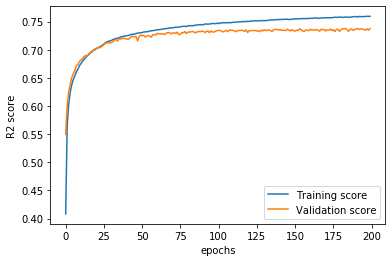

In [158]:
# R2 score
plt.plot(data_['r2_score'],label='Training score')
plt.plot(data_['val_r2_score'],label='Validation score')
plt.xlabel('epochs')
plt.ylabel('R2 score')
plt.legend()
plt.show()

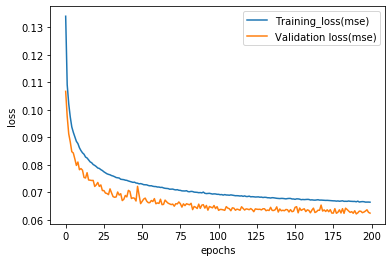

In [159]:
#mean absolute error
plt.plot(data_['loss'],label='Training_loss(mse)')
plt.plot(data_['val_loss'],label='Validation loss(mse)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

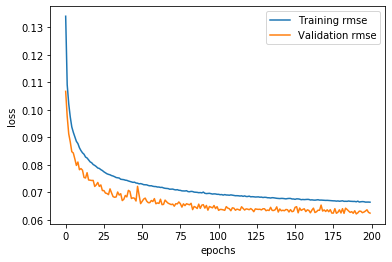

In [160]:
plt.plot(data_['rmse'],label='Training rmse')
plt.plot(data_['val_rmse'],label='Validation rmse')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

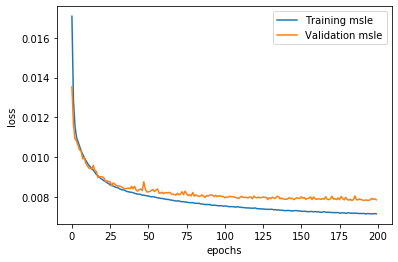

In [161]:
plt.plot(data_['mean_squared_logarithmic_error'],label='Training msle')
plt.plot(data_['val_mean_squared_logarithmic_error'],label='Validation msle')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## TESTING MODEL

In [164]:
model.load_weights('model_weights/best_model_ADAM2.h5')

In [166]:
Y_pred=model.predict(X_test)

In [175]:
train_loss,train_r2_score,train_rmse,train_mse,train_msle=model.evaluate(X_train,Y_train)

538215/538215 [==============================] - 207s 384us/step


In [179]:
print("Final training loss: ",train_loss)
print("Final R2 score: ",train_r2_score)
print("Final training root mean square error: ",train_rmse)
print("Final training Mean square error: ",train_mse)
print("Final training mean square logarithmic error: ",train_msle)

Final training loss:  0.06047287353622997
Final R2 score:  0.747837798094285
Final training root mean square error:  0.06047287239184604
Final training Mean square error:  0.021138698841993743
Final training mean square logarithmic error:  0.007155242959063718


In [168]:
test_loss,test_r2_score,test_rmse,test_mse,test_msle=model.evaluate(X_test,Y_test)

134554/134554 [==============================] - 26s 195us/step


In [180]:
print("Final testing loss: ",test_loss)
print("Final R2 score: ",test_r2_score)
print("Final testing root mean square error: ",test_rmse)
print("Final testing Mean square error: ",test_mse)
print("Final testing mean square logarithmic error: ",test_msle)

Final testing loss:  0.06369260631888507
Final R2 score:  0.7301036915778476
Final testing root mean square error:  0.0636926051690214
Final testing Mean square error:  0.022567282792167267
Final testing mean square logarithmic error:  0.007573077196385405
